In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
data_path = r'C:\Users\Hadar\Downloads\data\dogs_vs_cats'
os.chdir(data_path)

In [3]:
os.getcwd() # get current working dir

'C:\\Users\\Hadar\\Downloads\\data\\dogs_vs_cats'

In [4]:
os.path

<module 'ntpath' from 'C:\\Users\\Hadar\\anaconda3\\envs\\ai37\\lib\\ntpath.py'>

In [5]:
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('train/dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('train/cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('train/dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('train/cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('train/dog*'), 50):
        shutil.move(c, 'test/dog')
    for c in random.sample(glob.glob('train/cat*'), 50):
        shutil.move(c, 'test/cat')

In [6]:
os.getcwd()

'C:\\Users\\Hadar\\Downloads\\data\\dogs_vs_cats'

In [7]:
train_path = os.path.join(data_path, 'train')
valid_path = os.path.join(data_path, 'valid')
test_path = os.path.join(data_path, 'test')

In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [10]:
imgs, labels = next(train_batches)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(4, 3, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
#         ax.axis('off')
    plt.tight_layout()
    plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


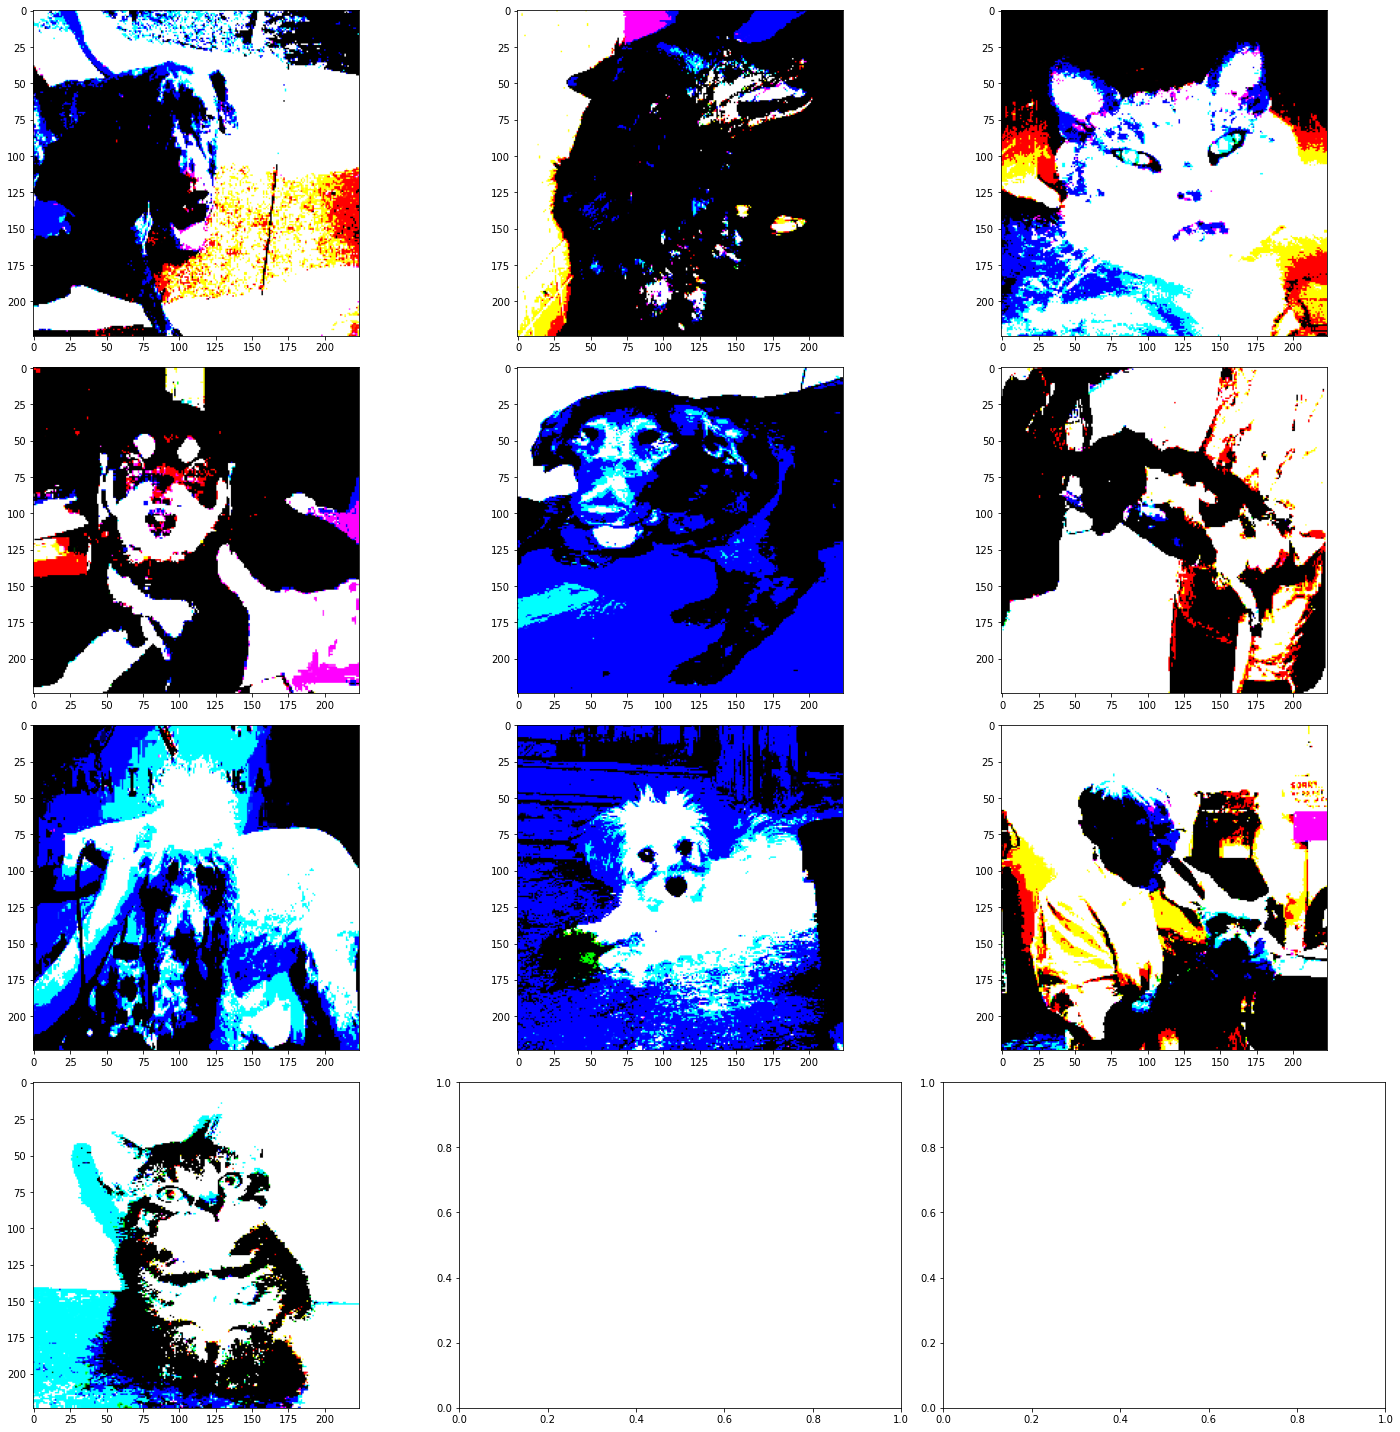

In [12]:
plotImages(imgs)
print(labels)

In [13]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 27s - loss: 17.1688 - accuracy: 0.5730 - val_loss: 5.0905 - val_accuracy: 0.6000
Epoch 2/10
100/100 - 27s - loss: 1.9910 - accuracy: 0.7850 - val_loss: 5.7651 - val_accuracy: 0.6250
Epoch 3/10
100/100 - 28s - loss: 0.6291 - accuracy: 0.8880 - val_loss: 2.9746 - val_accuracy: 0.6800
Epoch 4/10
100/100 - 30s - loss: 0.1947 - accuracy: 0.9520 - val_loss: 2.7968 - val_accuracy: 0.6350
Epoch 5/10
100/100 - 28s - loss: 0.0443 - accuracy: 0.9850 - val_loss: 3.5605 - val_accuracy: 0.6250
Epoch 6/10
100/100 - 27s - loss: 0.0444 - accuracy: 0.9900 - val_loss: 4.8260 - val_accuracy: 0.6200
Epoch 7/10
100/100 - 27s - loss: 0.0936 - accuracy: 0.9750 - val_loss: 2.8277 - val_accuracy: 0.6350
Epoch 8/10
100/100 - 27s - loss: 0.0144 - accuracy: 0.9950 - val_loss: 2.3633 - val_accuracy: 0.6550
Epoch 9/10
100/100 - 27s - loss: 0.0025 - accuracy: 0.9990 - val_loss: 2.5748 - val_accuracy: 0.6550
Epoch 10/10
100/100 - 26s - loss: 3.9554e-04 - accuracy: 1.0000 - val_loss: 2.5155 - val_a

## Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


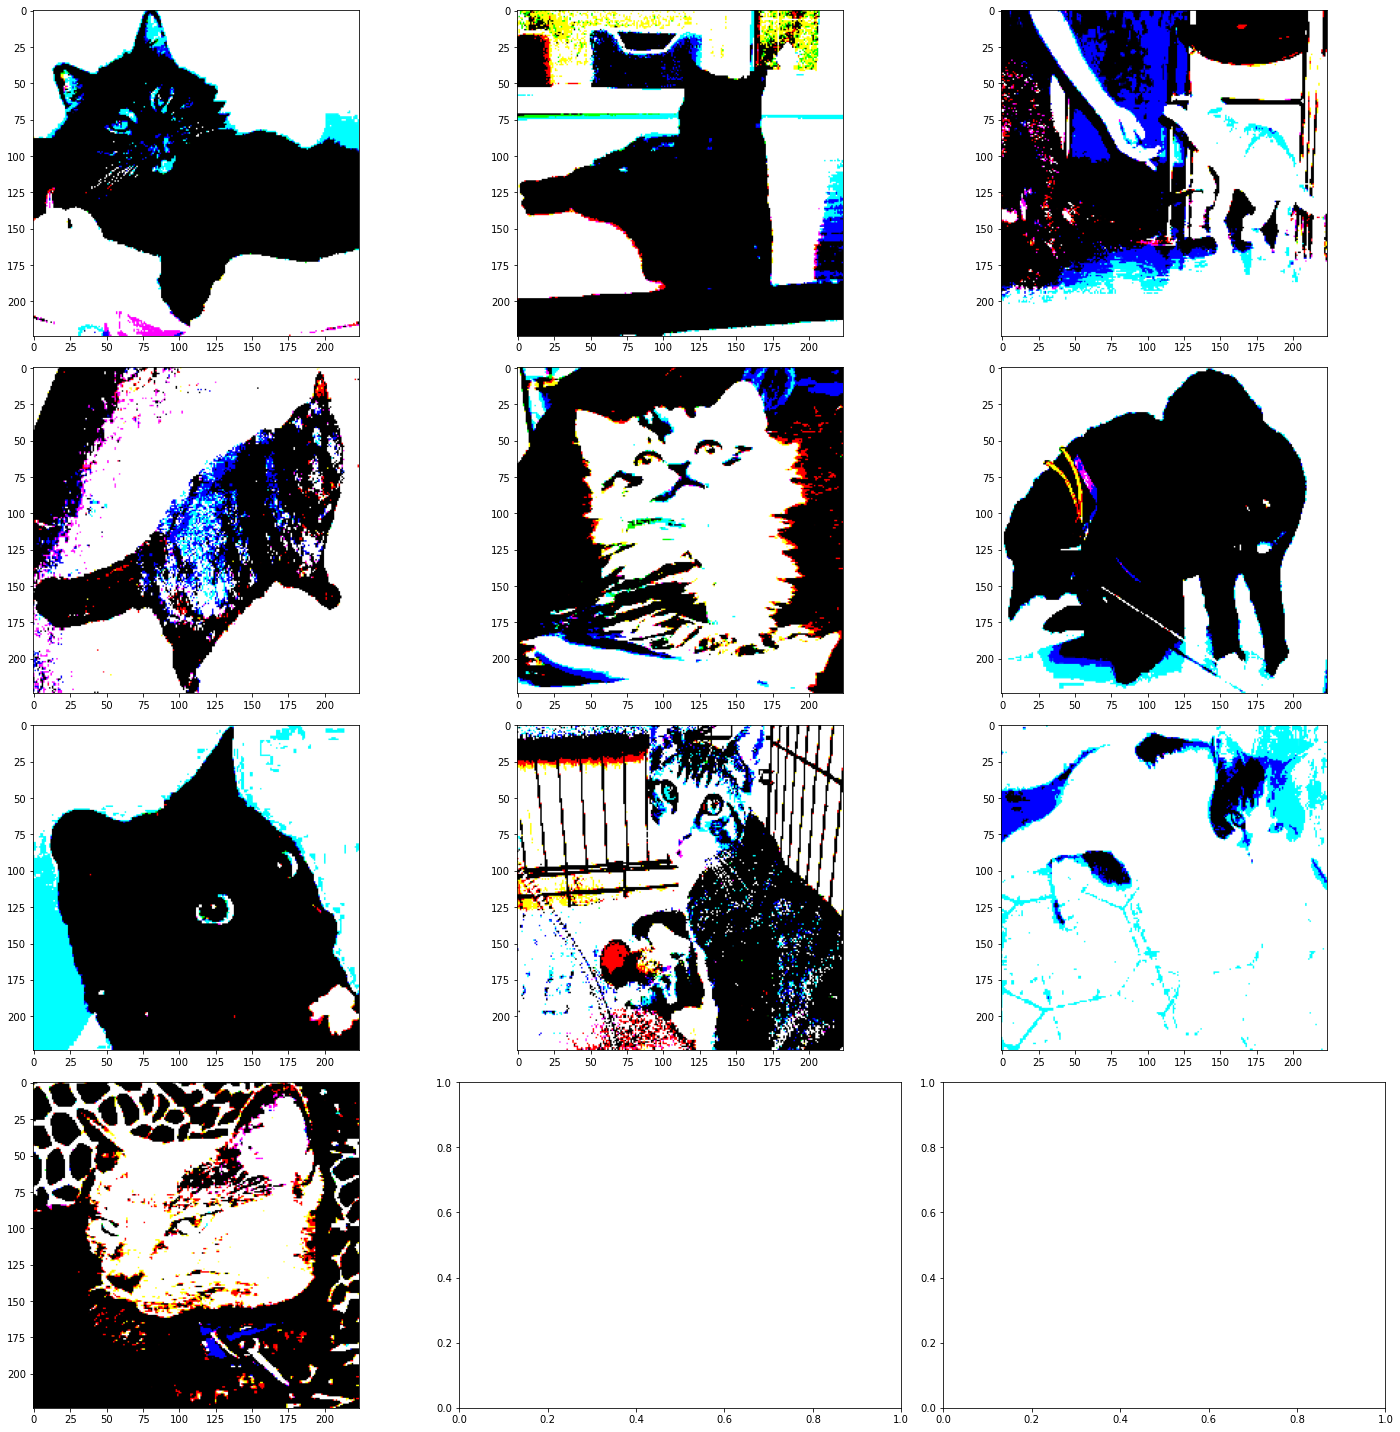

In [17]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [18]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
predictions = model.predict(x=test_batches, verbose=2)

10/10 - 1s


In [20]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [21]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('normalized confusion matrix')
    else:
        print('confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
                  color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

confusion matrix, without normalization
[[30 20]
 [24 26]]


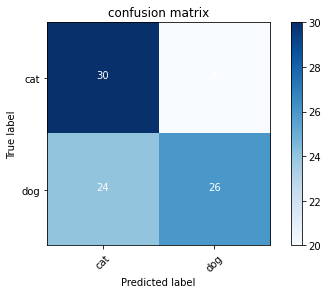

In [24]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

## Build Fine-tune VGG16 model

In [25]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [26]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}  

In [28]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [29]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [30]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [31]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [33]:
for layer in model.layers:
    layer.trainable = False

In [34]:
model.add(Dense(units=2, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [36]:
params = count_params(model)
assert params['trainable_params'] == 8194
assert params['non_trainable_params'] == 134260544

## predict using vgg16 model

In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 188s - loss: 0.3178 - accuracy: 0.8610 - val_loss: 0.1172 - val_accuracy: 0.9550
Epoch 2/5
100/100 - 205s - loss: 0.0936 - accuracy: 0.9610 - val_loss: 0.0896 - val_accuracy: 0.9700
Epoch 3/5
100/100 - 192s - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.0740 - val_accuracy: 0.9800
Epoch 4/5
100/100 - 187s - loss: 0.0450 - accuracy: 0.9800 - val_loss: 0.0709 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 186s - loss: 0.0330 - accuracy: 0.9920 - val_loss: 0.0671 - val_accuracy: 0.9800


In [39]:
predictions = model.predict(x=test_batches, verbose=2)

10/10 - 14s


In [40]:
predictions[0:3], predictions[-4:-1]

(array([[9.9963903e-01, 3.6093721e-04],
        [9.9998033e-01, 1.9668592e-05],
        [6.0780716e-01, 3.9219287e-01]], dtype=float32),
 array([[5.0364886e-03, 9.9496353e-01],
        [2.7730560e-04, 9.9972266e-01],
        [5.6073264e-07, 9.9999940e-01]], dtype=float32))

In [41]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [42]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

confusion matrix, without normalization
[[50  0]
 [ 1 49]]


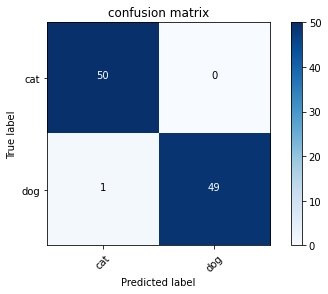

In [44]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

# MobileNet

In [45]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [46]:
def prepare_image(file):
    img_path = r'C:\Users\Hadar\Downloads\data\MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_arrat_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_arrat_expanded_dims)

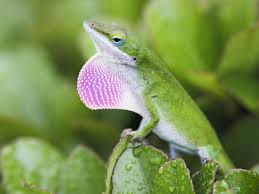

In [47]:
from IPython.display import Image
Image(filename=r'C:\Users\Hadar\Downloads\data\MobileNet-samples/1.jpg', width=300, height=200)

In [48]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01682714', 'American_chameleon', 0.9442489),
  ('n01693334', 'green_lizard', 0.046568558),
  ('n01687978', 'agama', 0.0055545378),
  ('n01685808', 'whiptail', 0.002030738),
  ('n01630670', 'common_newt', 0.00048982893)]]

In [49]:
data_path = r'C:\Users\Hadar\Downloads\data\Sign-Language-Digits-Dataset'
os.chdir(data_path)

In [50]:
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
        
        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for j in test_samples:
            shutil.move(f'train/{i}/{j}', f'test/{i}')    
        

In [51]:
train_path = os.path.join(data_path, 'train')
valid_path = os.path.join(data_path, 'valid')
test_path = os.path.join(data_path, 'test')

In [52]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224, 224),  batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [53]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

### Modify Model

In [54]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [55]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [56]:
x = mobile.layers[-6].output # take all layers until 6th (not included) from last layer, dumps 5 lasts layers
output = Dense(units=10, activation='softmax')(x) # adds a layer

In [57]:
model = Model(inputs=mobile.input, outputs=output) # build a model out of the extracted layers

In [58]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [59]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [60]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

### Train the model

In [61]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
172/172 - 61s - loss: 0.6088 - accuracy: 0.8230 - val_loss: 0.5014 - val_accuracy: 0.7967
Epoch 2/10
172/172 - 55s - loss: 0.1043 - accuracy: 0.9860 - val_loss: 0.1669 - val_accuracy: 0.9700
Epoch 3/10
172/172 - 57s - loss: 0.0464 - accuracy: 0.9977 - val_loss: 0.1508 - val_accuracy: 0.9700
Epoch 4/10
172/172 - 58s - loss: 0.0288 - accuracy: 0.9971 - val_loss: 0.1183 - val_accuracy: 0.9833
Epoch 5/10
172/172 - 55s - loss: 0.0233 - accuracy: 0.9971 - val_loss: 0.1200 - val_accuracy: 0.9867
Epoch 6/10
172/172 - 57s - loss: 0.0172 - accuracy: 0.9988 - val_loss: 0.1252 - val_accuracy: 0.9867
Epoch 7/10
172/172 - 57s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.1256 - val_accuracy: 0.9833
Epoch 8/10
172/172 - 54s - loss: 0.0130 - accuracy: 0.9971 - val_loss: 0.1498 - val_accuracy: 0.9800
Epoch 9/10
172/172 - 59s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9733
Epoch 10/10
172/172 - 62s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1275 - val_accura

In [63]:
test_labels = test_batches.classes

In [64]:
predictions = model.predict(x=test_batches, verbose=1)

5/5 [==============================] - 1s 176ms/step


In [65]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [66]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 4 1 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


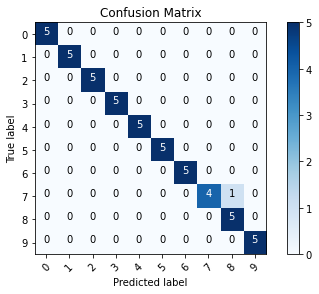

In [67]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [68]:
gen = ImageDataGenerator(rotation_range=10, # radians
                         width_shift_range=0.1, # % of the image width
                         height_shift_range=0.1,
                         shear_range=0.15,
                         zoom_range=0.1,
                         channel_shift_range=10.,
                         horizontal_flip=True
                        )

In [69]:
data_path = r'C:\Users\Hadar\Downloads\data\dogs_vs_cats\train\dog'

In [70]:
chosen_image = random.choice(os.listdir(data_path))

In [71]:
image_path = data_path + '/' + chosen_image
image_path

'C:\\Users\\Hadar\\Downloads\\data\\dogs_vs_cats\\train\\dog/dog.7339.jpg'

In [72]:
assert os.path.isfile(image_path)

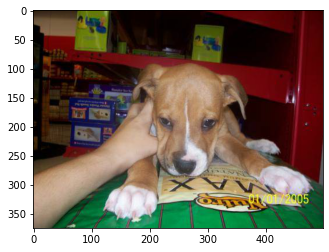

In [73]:
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

In [74]:
aug_iter = gen.flow(image)

In [75]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

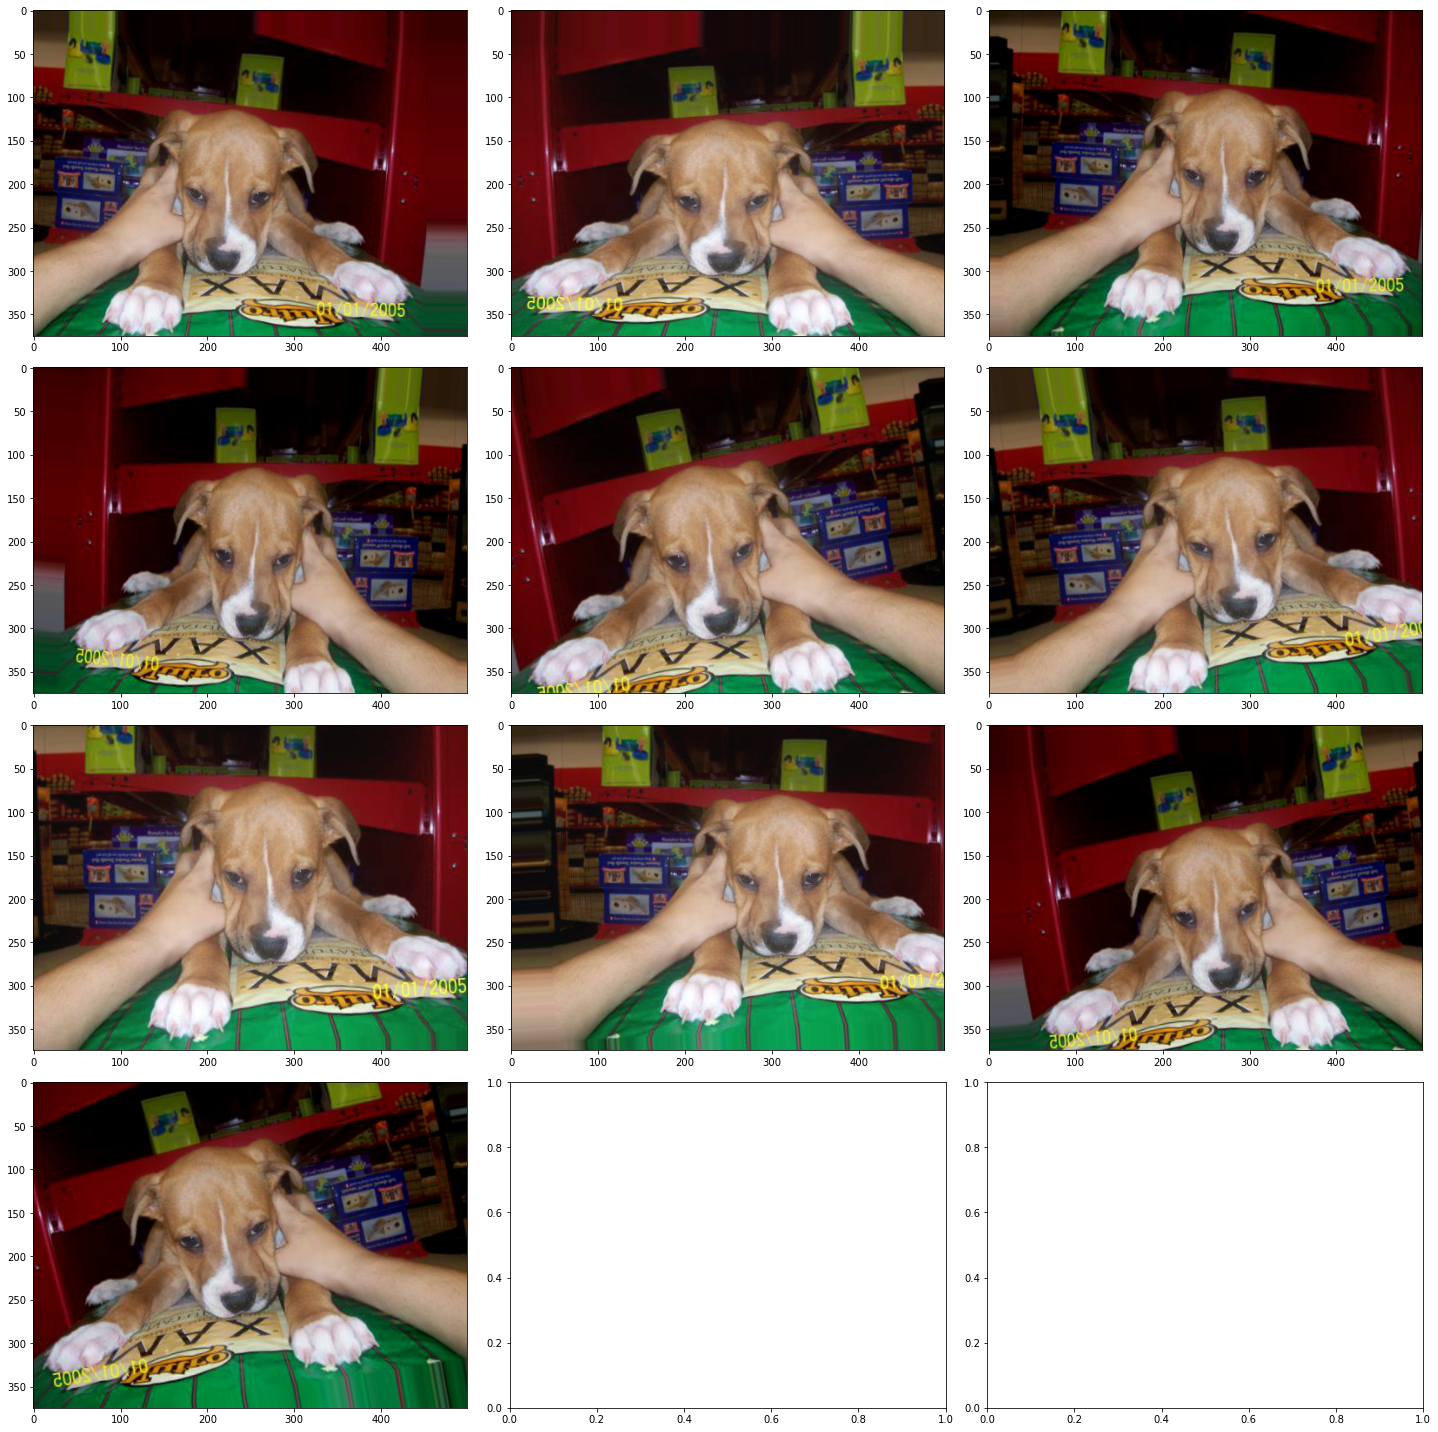

In [76]:
plotImages(aug_images)